# Importing libraries and modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import operator
import csv
from collections import Counter
import numpy as np

In [2]:
startup_data = csv.DictReader(open('F:/datasets/startup_funding.csv'),skipinitialspace=True)

In [3]:
data_frame = pd.read_csv('F:/datasets/startup_funding.csv')

# Checking the trend of investments over the years. Finding Total number of fundings done in each year.

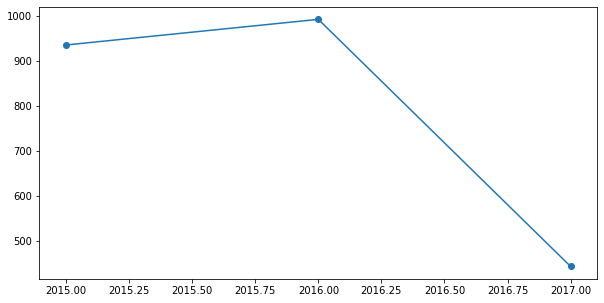

Total funding in 2015 = 936
Total funding in 2016 = 993
Total funding in 2017 = 443


In [4]:
file_data = startup_data
fundings = {}
for row in file_data:
    value = int(float(row['Date'][-4:]))
    fundings[value] = fundings.get(value, 0) + 1
years = []
funding = []
for i in fundings:
    years.append(i)
    funding.append(fundings[i])
plt.figure(figsize=(10,5))
plt.scatter(years, funding, marker='o')
plt.plot(years, funding)
plt.show()
for i in range(len(years) - 1, -1, -1):
    print("Total funding in",years[i], "=",funding[i])
    

# Finding top 10 Indian cities which have most number of startups

In [5]:
# Function to get name of each city separately 
def seperateCity(city):
    CityLocation = str(city) 
    return CityLocation.split("/")[0].strip()

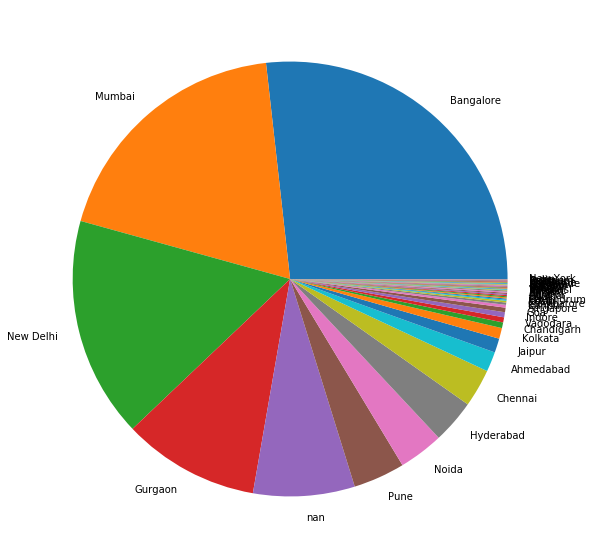

Top10 cities:-
Bangalore has 635 startups
Mumbai has 449 startups
New Delhi has 389 startups
Gurgaon has 241 startups
Pune has 91 startups
Noida has 79 startups
Hyderabad has 77 startups
Chennai has 67 startups
Ahmedabad has 35 startups
Jaipur has 25 startups


In [6]:
df = data_frame
df.CityLocation = df["CityLocation"].apply(seperateCity)
df.CityLocation.replace("Delhi","New Delhi",inplace=True)
df.CityLocation.replace("bangalore","Bangalore",inplace=True)
ans = df.CityLocation.value_counts()
cities = ans.index
counts = ans.values
plt.figure(figsize=(10,10))
plt.pie(counts, labels=cities)
plt.show()
i = 0
count = 1
print("Top10 cities:-")
while count <= 10:
    if cities[i] != 'nan':
        print(cities[i], "has",counts[i],"startups")
        count += 1
    i += 1

# Finding percentage of funding each city has got (among top 10 Indian cities only).

In [7]:
df = data_frame
location=df[['CityLocation','AmountInUSD']]
location.dropna(inplace=True)
location['AmountInUSD']=location['AmountInUSD'].str.replace(',','').astype(float)
location.replace('Delhi','New Delhi',inplace=True)
location.replace('bangalore','Bangalore',inplace=True)
location['CityLocation'] = location['CityLocation'].str.split(' /').str[0]
location['CityLocation'] = location['CityLocation'].str.split('/').str[0]
dict={}
for index,i in location.iterrows():
    if i['CityLocation'] in dict:
        dict[i['CityLocation']]+=i['AmountInUSD']
    else:
        dict[i['CityLocation']]=i['AmountInUSD']
#print(dict)
d=Counter(dict).most_common(10)
amt=[]
for i in d:
    amt.append(i[1])
sum_n=sum(amt)
per=[]
for i in amt:
    t=format((i/sum_n)*100,'.2f')
    per.append(t)
for i in range(10):
    print(d[i][0],"received",per[i],"% of funding")

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
F:\anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

Bangalore received 46.33 % of funding
New Delhi received 15.50 % of funding
Mumbai received 12.95 % of funding
Gurgaon received 11.38 % of funding
nan received 7.00 % of funding
Chennai received 2.26 % of funding
Pune received 2.02 % of funding
Hyderabad received 1.07 % of funding
Noida received 0.94 % of funding
Ahmedabad received 0.54 % of funding


# Finding percentage of amount funded for each investment type

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


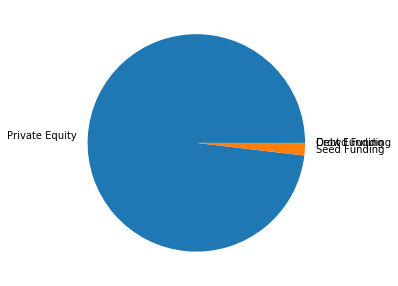

In [8]:
dataset = data_frame
dataset.InvestmentType.replace("SeedFunding", "Seed Funding", inplace=True)
dataset.InvestmentType.replace("Crowd funding", "Crowd Funding", inplace=True)
dataset.InvestmentType.replace("PrivateEquity", "Private Equity", inplace=True)
dataset.AmountInUSD = dataset.AmountInUSD.apply(lambda x: float(str(x).replace(",","")))
iamount = dataset.groupby('InvestmentType').AmountInUSD.sum().sort_values(ascending=False)
its = iamount.index
itas = iamount.values
peramount = np.true_divide(itas, itas.sum())*100
for i in range(len(its)):
    print(its[i], format(peramount[i],".2f"))
plt.figure(figsize=(10,5))
plt.pie(peramount,labels = its)
plt.show()

# Finding Which type of companies got more easily funding and percentage of the total amount funded to that companies.(among top 5 only)

In [9]:
dataset = data_frame
dataset.IndustryVertical.replace("eCommerce","Ecommerce", inplace=True)
dataset.IndustryVertical.replace("ecommerce","Ecommerce", inplace=True)
dataset.IndustryVertical.replace("ECommerce","Ecommerce", inplace=True)
#print(dataset.IndustryVertical.value_counts())
dataset.AmountInUSD = dataset.AmountInUSD.apply(lambda x: float(str(x).replace(",","")))
ivamount = dataset.groupby('IndustryVertical').AmountInUSD.sum().sort_values(ascending=False)[0:5]
#print(ivamount)
its = ivamount.index
itas = ivamount.values
peramount = np.true_divide(itas, itas.sum())*100
print("Top5 industries:-")
for i in range(len(its)):
    print(its[i], "got",format(peramount[i],".2f"),"% of funding")

Top5 industries:-
Ecommerce got 40.53 % of funding
Consumer Internet got 35.95 % of funding
Technology got 10.45 % of funding
Online Marketplace got 6.63 % of funding
E-Commerce & M-Commerce platform got 6.44 % of funding


# Finding top 5 startups with most amount of total funding.

In [10]:
dataset = data_frame
dataset.StartupName.replace("Flipkart.com","Flipkart", inplace=True)
dataset.StartupName.replace("Ola Cabs","Ola", inplace=True)
dataset.StartupName.replace("Olacabs","Ola", inplace=True)
dataset.StartupName.replace("Oyo Rooms","Oyo", inplace=True)
dataset.StartupName.replace("Paytm Marketplace","Paytm", inplace=True)
dataset.AmountInUSD = dataset.AmountInUSD.apply(lambda x: float(str(x).replace(",","")))
ivamount = dataset.groupby('StartupName').AmountInUSD.sum().sort_values(ascending=False)[0:5]
its = ivamount.index
print("Top5 startups:-")
for i in range(len(its)):
    print(its[i])

Top5 startups:-
Paytm
Flipkart
Ola
Snapdeal
Oyo


# Finding the top 5 startups who received the most number of funding rounds.

In [11]:
startup = data_frame
startup.replace('OyoRooms','Oyo',inplace=True)
startup.replace('Oyorooms','Oyo',inplace=True)
startup.replace('Oyo Rooms','Oyo',inplace=True)
startup.replace('OYO Rooms','Oyo',inplace=True)
startup.replace('Ola Cabs','Ola',inplace=True)
startup.replace('Olacabs','Ola',inplace=True)
startup.replace('Flipkart.com','Flipkart',inplace=True)
startup.replace('Paytm Marketplace','Paytm',inplace=True)
ans = startup.StartupName.value_counts()
its = ans.index
itas = ans.values
dic = {}
for i in range(0,5):
    print(its[i], "got",itas[i],"rounds of funding")

Ola got 9 rounds of funding
Swiggy got 7 rounds of funding
UrbanClap got 6 rounds of funding
Oyo got 6 rounds of funding
Paytm got 6 rounds of funding


# Finding the Investor who have invested maximum number of times.

In [12]:
data = data_frame
data.InvestorsName.dropna(inplace=True)
dic = {}
def separateinvestors(value):
    listans = value.split(',')
    for i in range(len(listans)):
        listans[i] = str(listans[i]).replace(" ","")
        dic[listans[i]] = dic.get(listans[i], 0) + 1
data.InvestorsName.apply(separateinvestors)
maxvalue = -1
ans = ""
for i in dic:
    if dic[i] > maxvalue:
        maxvalue = dic[i]
        ans = i
print(ans, "invested",maxvalue,"times")

SequoiaCapital invested 64 times
